#Categorical dataset - Lung cancer prediction
#Importing Necessary Libraries and Functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
import numpy as np

In [110]:
#Reading the file
lung_cancer = pd.read_csv("/Users/thwishaabansal/Desktop/UG3/OPSM322/final assessmne/cancer patient data sets 2.csv")

In [111]:
#Checking for null datasets
lung_cancer.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [112]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [113]:
#Checking the shape of the dataset
print(lung_cancer.shape)

(1000, 26)


In [114]:
lung_cancer.duplicated().sum()

0

In [115]:
#Checking unique values in the dataset
lung_cancer.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [116]:
#Looking at the distribution of data using different statistics to check if there are outliers
lung_cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [117]:
#We are now dropping columns that are not required or helpful in our analysis
lung_cancer.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
lung_cancer

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [118]:
#Checking correlation between different variables
lung_cancer_corr = lung_cancer.corr()
lung_cancer_corr

/var/folders/b0/s41gr2jj1pgctkj8xt3rv1w80000gn/T/ipykernel_85635/4223795938.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lung_cancer_corr = lung_cancer.corr()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


<Axes: title={'center': 'Correlation Matrix'}>

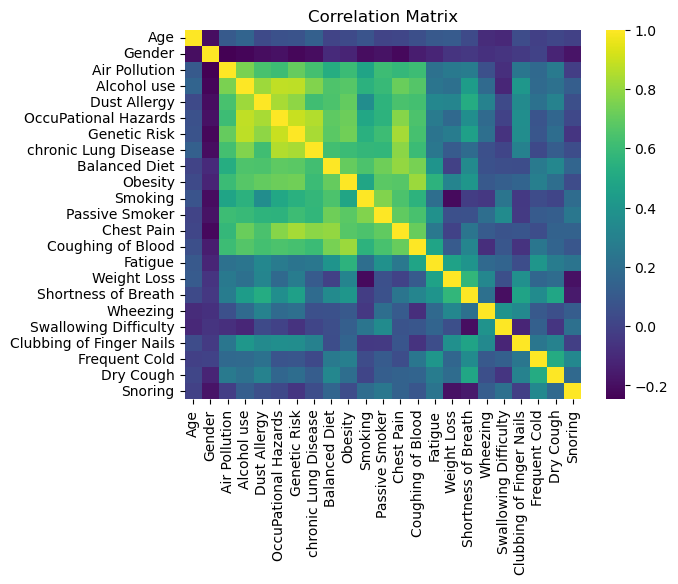

In [119]:
#We are now making a correlation matrix in order to visually see which variables are related to each other
plt.title("Correlation Matrix")
sns.heatmap(lung_cancer_corr, cmap='viridis')

/Users/thwishaabansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/thwishaabansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

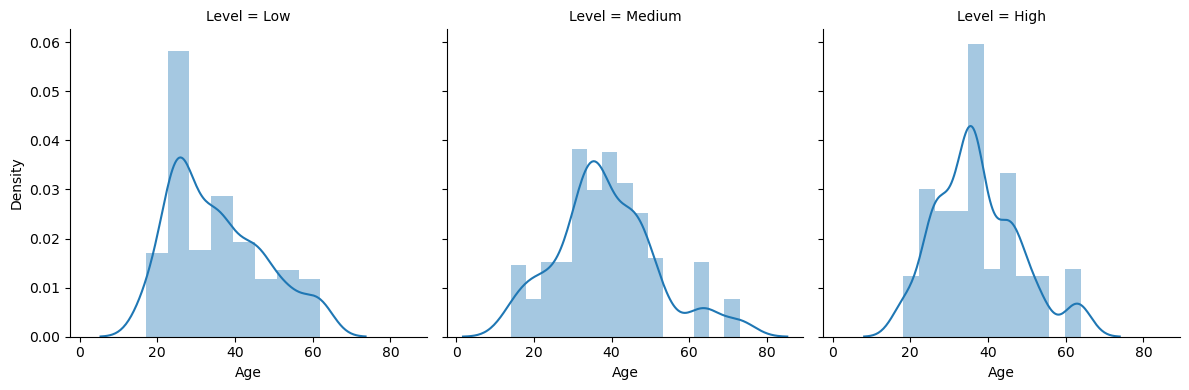

In [120]:
#We are now looking at the distribution of the target variable - level, against age and gender
sea = sns.FacetGrid(lung_cancer, col = "Level", height = 4)
sea.map(sns.distplot, "Age")
#We see that people who fall in the low risk of getting lung cancer are highest in the age range 25 to 25. The distribution is skewed to the left
#Medium risk of getting lung cancer is more evenly distirbtion with 30 to 40 being the primary audience
#High risk of getting lung cancer - the number is highest in the 40 age range followed by 45 

/Users/thwishaabansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/thwishaabansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

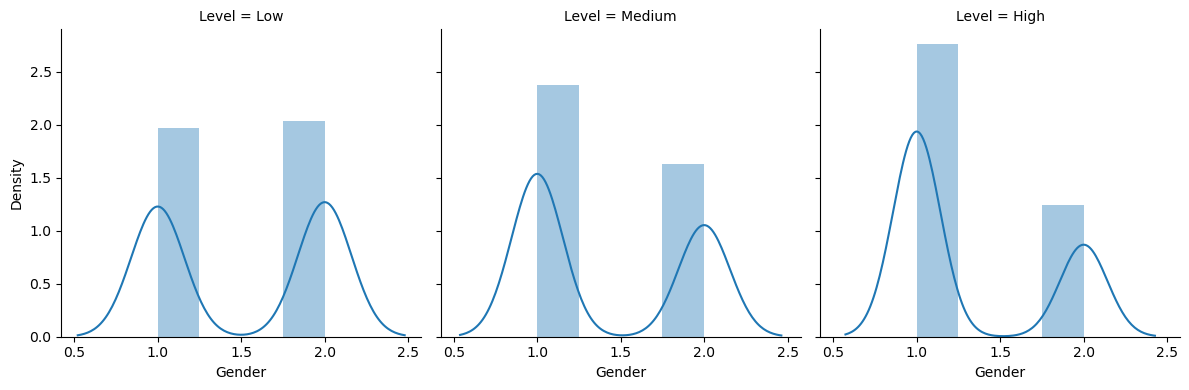

In [121]:
sea = sns.FacetGrid(lung_cancer, col = "Level", height = 4)
sea.map(sns.distplot, "Gender")
#Looking at gender - people with low risk of getting lung cancer is equally distubuted between males and feamles and the level is around 2
#medium risk is higher in one gender compared to the other. Here in the dataset they have not given if 1 attributes to male or female so we cannot determine that. 
#High risk - 1 is much higher than 

In [122]:
#Dropping NA values
lung_cancer.dropna()
lung_cancer.shape

(1000, 24)

In [123]:
#The levels 'High' are replaced with 2, 'Medium' with 1, and 'Low' with 0 to create an effiecient dataset
print('\n')
print('Cancer Levels: ', lung_cancer['Level'].unique())

# Replacing levels with int
lung_cancer["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', lung_cancer['Level'].unique())

print('\nColumns in dataframe: \n', lung_cancer.columns)
print('\n')



Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')




In [124]:
#Printing out all the columns 
print('\n')
lung_cancer.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [125]:
# Split the data into 80-20 train-test sets
X = lung_cancer.drop('Level', axis=1)
y = lung_cancer['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
#Starting modelling for our categorical dataset
#Logistic Regression 
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Accuracy Logistic Regression:", log_reg_accuracy*100)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, log_reg_predictions))

#The accuracy is given as 1.0, indicating a perfect prediction on the test set.
#This outcome suggests that the model is able to correctly classify instances into their respective classes.
#However it might be potential overfitting, we will run cross validation to check later

Accuracy Logistic Regression: 1.0

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [127]:
#KNN CLASSIFIFIER
knn_classifier_scaled = KNeighborsClassifier(n_neighbors=40)
knn_model_scaled = knn_classifier_scaled.fit(X_train_scaled, y_train)
knn_preds_scaled = knn_model_scaled.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_preds_scaled)
print("\nAccuracy KNN (scaled data):", knn_accuracy * 100)
print("\nClassification Report for KNN:\n", classification_report(y_test, knn_preds_scaled))
#The overall accuracy of the KNN model on the test set is 94%.
#The model correctly predicted the class for 94% of the instances.
#The other metrics also seem to be perfroming well but theres only a 0.88 recall for 1 which can be improved


Accuracy KNN (scaled data): 94.5

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.88      0.95      0.92        63
           2       0.96      1.00      0.98        82

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Linear Discriminant Analysis
LDAmodel = LinearDiscriminantAnalysis()  
LDAmodel.fit(X_train_scaled, y_train)    
LDApreds = LDAmodel.predict(X_test_scaled)    
print("\nAccuracy Linear DA:", accuracy_score(y_test, LDApreds) * 100)
print("\nClassification Report for Linear DA:\n", classification_report(y_test, LDApreds))
#The overall accuracy of the Linear Discriminant Analysis is 97%
#The model correctly predicted the class for 97% of the instances.
#It also has abalanced precision and recall for all classes.


Accuracy Linear DA: 97.0

Classification Report for Linear DA:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.91      1.00      0.95        63
           2       1.00      1.00      1.00        82

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200



In [129]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Quadratic Discriminant Analysis
QDAmodel = QuadraticDiscriminantAnalysis()
QDAmodel.fit(X_train_scaled, y_train)
QDApreds = QDAmodel.predict(X_test_scaled)
print("\nAccuracy Quadratic DA:", accuracy_score(y_test, QDApreds) * 100)
print("\nClassification Report for Quadratic DA:\n", classification_report(y_test, QDApreds))
#We have another model which perfroms exceptionally well, we can again use cross validation on this model to see if it performs well to unseen data


Accuracy Quadratic DA: 100.0

Classification Report for Quadratic DA:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/Users/thwishaabansal/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [130]:
#SVM with linear kernel
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train_scaled, y_train) 
SVMpreds = SVM_model.predict(X_test_scaled)
print("\nAccuracy SVM:", accuracy_score(y_test, SVMpreds) * 100)
print("\nClassification Report for SVM:\n", classification_report(y_test, SVMpreds))
#SVM also performs at 100%. We can again use cross validation on this model to see if it performs well to unseen data


Accuracy SVM: 100.0

Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [131]:
#Naive Bayes
GNBclassifier = GaussianNB()
GNBmodel = GNBclassifier.fit(X_train_scaled, y_train)
GNBpreds = GNBmodel.predict(X_test_scaled)
print("Accuracy Gaussian NB:", accuracy_score(y_test, GNBpreds) * 100)
print("\nClassification Report for Gaussian NB:\n", classification_report(y_test, GNBpreds))
#The overall accuracy of the Naive Bayes model is 90%
#The model correctly predicted the class for 90% of the instances.

Accuracy Gaussian NB: 89.5

Classification Report for Gaussian NB:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.85      0.84      0.85        63
           2       0.87      0.96      0.91        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [132]:
#Decision Tree
DTclassifier = DecisionTreeClassifier(max_depth=4, random_state=23)
DTmodel = DTclassifier.fit(X_train_scaled, y_train)
DTpreds = DTmodel.predict(X_test_scaled)
print("\nAccuracy Decision Tree:", accuracy_score(y_test, DTpreds) * 100)
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, DTpreds))
#The overall accuracy of the Decision Tree model is 98%
#The model correctly predicted the class for 98% of the instances.


Accuracy Decision Tree: 99.5

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        63
           2       1.00      0.99      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [133]:
#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf_classifier.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("\nAccuracy Random Forest Classifier (scaled data):", rf_accuracy * 100)
print("\nClassification Report for Random Forest:\n", classification_report(y_test, rf_preds))
##The overall accuracy of the Decision Tree model is 100%. We will run cross validation on new unseen data with this model


Accuracy Random Forest Classifier (scaled data): 100.0

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [134]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tabulate import tabulate

df = lung_cancer
X = df.drop('Level', axis=1)
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis()
}

# Create a table to store accuracies
accuracy_table = []

# Function to evaluate classifier and print accuracy scores
def evaluate_classifier(clf_name, clf, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(StandardScaler(), clf)
    pipeline.fit(X_train, y_train)
    cv_accuracy = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy'))
    test_predictions = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)  
    print(f"{clf_name} - Cross-Validated Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"{clf_name} - Test Set Accuracy: {test_accuracy * 100:.2f}%")    
    return [clf_name, f"{cv_accuracy * 100:.2f}%", f"{test_accuracy * 100:.2f}%"]

# Perform evaluation for each classifier
for clf_name, clf in classifiers.items():
    accuracy_table.append(evaluate_classifier(clf_name, clf, X_train, y_train, X_test, y_test))

# Display the accuracy table
headers = ["Model", "Cross-Validated Accuracy", "Test Set Accuracy"]
print(tabulate(accuracy_table, headers, tablefmt="pretty"))

Logistic Regression - Cross-Validated Accuracy: 100.00%
Logistic Regression - Test Set Accuracy: 100.00%
KNN Classifier - Cross-Validated Accuracy: 100.00%
KNN Classifier - Test Set Accuracy: 100.00%
Decision Tree Classifier - Cross-Validated Accuracy: 100.00%
Decision Tree Classifier - Test Set Accuracy: 100.00%
Random Forest Classifier - Cross-Validated Accuracy: 100.00%
Random Forest Classifier - Test Set Accuracy: 100.00%
SVM - Cross-Validated Accuracy: 100.00%
SVM - Test Set Accuracy: 100.00%
Naive Bayes - Cross-Validated Accuracy: 89.25%
Naive Bayes - Test Set Accuracy: 89.50%
LDA - Cross-Validated Accuracy: 96.88%
LDA - Test Set Accuracy: 97.00%
+--------------------------+--------------------------+-------------------+
|          Model           | Cross-Validated Accuracy | Test Set Accuracy |
+--------------------------+--------------------------+-------------------+
|   Logistic Regression    |         100.00%          |      100.00%      |
|      KNN Classifier      |       

Random Forest Model Accuracy on PCA-Reduced Features: 97.50%


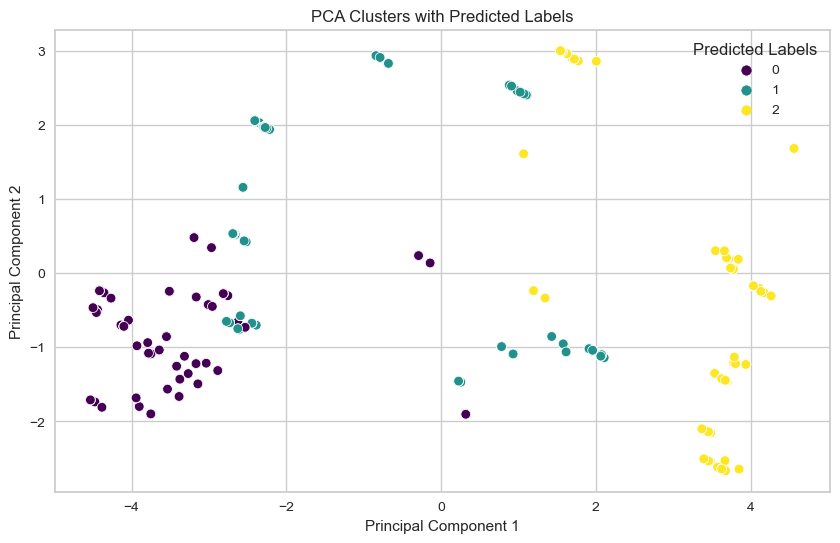

Explained Variance Ratio: [0.39254375 0.11978538 0.08580961]


In [156]:
# Apply PCA to reduce dimensionality
n_components = 3  # for a 2D scatter plot
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)
X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy on PCA-Reduced Features: {accuracy * 100:.2f}%")

# Add predicted labels to the PCA dataset
X_pca_with_labels = pca.transform(StandardScaler().fit_transform(X))
df_pca = pd.DataFrame(data=X_pca_with_labels, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca['Predicted_Labels'] = rf_classifier.predict(X_pca_with_labels)

# Visualize PCA clusters with predicted labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Labels', data=df_pca, palette='viridis')
plt.title('PCA Clusters with Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Labels', loc='best')
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

In [157]:
from sklearn.tree import DecisionTreeClassifier
# Apply PCA to reduce dimensionality
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))

# Train Decision Tree on the reduced feature set
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))
y_pred_dt = dt_classifier.predict(X_test_pca)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy on PCA-Reduced Features: {accuracy_dt * 100:.2f}%")

Decision Tree Model Accuracy on PCA-Reduced Features: 82.50%


In [158]:
from sklearn.neighbors import KNeighborsClassifier

# Apply PCA to reduce dimensionality
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))

# Train KNN on the reduced feature set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))
y_pred_knn = knn_classifier.predict(X_test_pca)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy on PCA-Reduced Features: {accuracy_knn * 100:.2f}%")

KNN Model Accuracy on PCA-Reduced Features: 85.50%


In [159]:
from sklearn.linear_model import LogisticRegression

# Apply PCA to reduce dimensionality
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))

# Train Logistic Regression on the reduced feature set
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))
y_pred_lr = lr_classifier.predict(X_test_pca)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy on PCA-Reduced Features: {accuracy_lr * 100:.2f}%")

Logistic Regression Model Accuracy on PCA-Reduced Features: 87.00%


In [ ]:
#All models (Logistic Regression, KNN, Decision Tree, Random Forest, SVM, Naive Bayes, LDA) achieved perfect accuracy (100%) on both cross-validation and the test set.
#There's a possibility of overfitting, especially when the training and test set accuracies are both 100%.\
#After applying PCA, the Random Forest model maintained a high accuracy of 97.50%, indicating that it generalizes well even with a reduced feature set.
#Other models (Logistic Regression, KNN, Decision Tree) experienced a reduction in accuracy when using PCA, suggesting that the dimensionality reduction may not have been as beneficial for those models in this context.
#The Random Forest model stands out as the most robust and generalizable model, maintaining high accuracy even with reduced features after PCA.

In [142]:
#Unsupervised learning methods on our categorical dataset
from sklearn.cluster import KMeans
lung_cancer_new = lung_cancer.drop(['Level'], axis=1).copy()
lung_cancer_new.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [148]:
from sklearn.cluster import KMeans
#Running KMeans
cno = 5 #running with 5 clusters after running it through the sandbox to check the optimum number
cno_arr = np.ones((cno))
kmeans = KMeans(init="random", n_clusters=cno, n_init=3, random_state=0).fit(lung_cancer_new)
l_lab = kmeans.labels_
print(l_lab)
lung_cancer_new['cluster_id'] = l_lab

[1 2 3 3 3 3 4 2 3 1 3 4 3 3 2 4 2 3 3 2 0 4 4 0 3 4 1 2 0 2 3 3 0 1 2 2 2
 0 0 1 2 2 1 2 2 1 0 1 2 1 2 2 2 1 1 1 4 4 1 1 4 4 4 1 3 1 1 0 4 2 1 4 1 1
 0 1 2 3 1 0 4 4 4 1 2 1 0 3 0 3 4 4 3 3 0 0 3 0 0 0 3 1 4 3 0 3 0 3 3 0 0
 3 2 2 0 3 3 1 2 3 2 3 4 3 0 2 4 2 3 3 2 0 4 4 0 2 4 1 2 0 2 3 3 0 1 2 3 2
 0 0 1 2 2 1 2 2 1 3 1 2 1 2 2 2 1 1 1 4 0 1 1 4 4 4 1 3 1 1 0 1 2 1 4 1 1
 0 1 2 3 1 2 4 4 4 1 2 1 0 3 0 3 2 4 3 3 0 0 3 0 0 0 3 0 4 3 0 3 0 3 3 0 0
 3 3 0 0 3 3 1 2 3 2 3 4 3 1 2 4 2 3 3 2 0 4 4 0 2 4 1 2 0 2 3 3 0 1 2 2 2
 0 0 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 1 1 4 2 1 1 4 4 4 1 3 1 1 0 2 2 1 4 1 1
 0 1 2 3 1 1 4 4 4 1 2 1 0 3 0 3 1 4 3 3 0 0 3 0 0 0 3 2 4 3 0 3 0 3 3 0 0
 3 2 1 0 3 3 1 2 3 2 3 4 3 2 2 4 2 3 3 2 0 4 4 0 2 4 1 2 0 2 3 3 0 1 2 2 2
 0 0 1 2 2 1 2 2 1 1 1 2 2 1 1 1 4 1 1 4 1 1 1 4 4 4 1 3 1 1 0 1 2 1 4 1 1
 0 1 2 3 1 4 4 4 4 1 4 1 3 4 0 3 1 4 3 3 3 3 3 0 0 3 3 1 4 3 3 3 0 3 3 0 0
 3 3 4 0 3 3 1 2 3 2 3 4 3 4 2 4 2 3 3 2 0 4 4 0 4 4 1 2 0 2 3 3 0 1 2 1 2
 0 0 1 2 2 1 2 2 1 3 1 2 

Number of Clusters (K): 1, WSS: 244849.68099999998
Number of Clusters (K): 2, WSS: 148808.90344830652
Number of Clusters (K): 3, WSS: 120741.81506750539
Number of Clusters (K): 4, WSS: 100438.61024567991
Number of Clusters (K): 5, WSS: 88412.33024628728
Number of Clusters (K): 6, WSS: 80669.7648265085


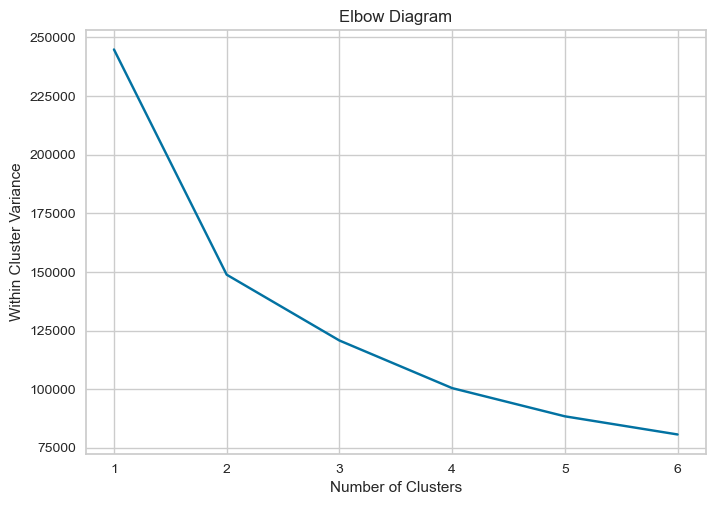

In [149]:
#Running an elbow diwagram
num_clust = np.array([1,2,3,4,5,6])
wss = np.zeros(6)
for i in range(6):
    cnum = num_clust[i]
    kmeans = KMeans(init="random", n_clusters=cnum, n_init=3, random_state=0).fit(lung_cancer_new)
    wss[i] = kmeans.inertia_
    print(f'Number of Clusters (K): {cnum}, WSS: {wss[i]}')
    
fig = plt.figure()
plt.title("Elbow Diagram")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Variance")
plt.plot(num_clust, wss)
plt.savefig("Elbow.jpg")

#The WSS is a measure of how spread out the data points within each cluster are
#Lower WSS values indicate that the data points within a cluster are closer to each other
#Here the optimum number of clusters look like 3 

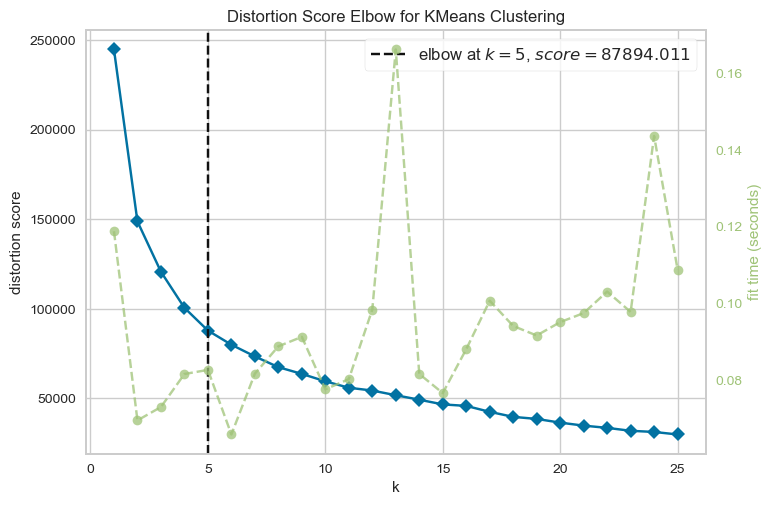

In [150]:
from yellowbrick.cluster import KElbowVisualizer

# KElbowVisualizer to further clarify elbow diagram and find out inflection point:
model = KMeans(random_state=0, init='k-means++', n_init=10)  # Set n_init explicitly
visualizer = KElbowVisualizer(model, k=(1, 26))
visualizer.fit(lung_cancer_new)
visualizer.poof()
plt.show()

In [152]:
score = silhouette_score(lung_cancer_new, l_lab, metric = 'euclidean')
print('Silhouette score  = {}', format(score)) 
#The silhouette score is 0.275, which is a relatively low score. This suggests that the clusters are not very well-separated

Silhouette score  = {} 0.2757068560836378


In [153]:
print(lung_cancer_new.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'cluster_id'],
      dtype='object')


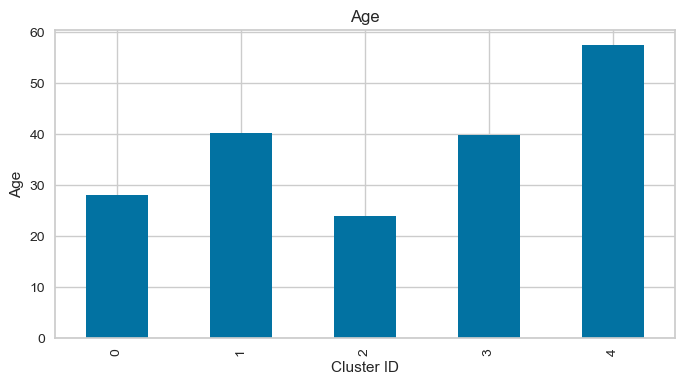

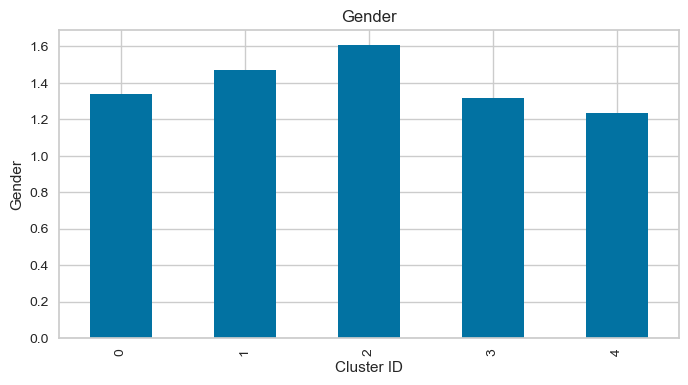

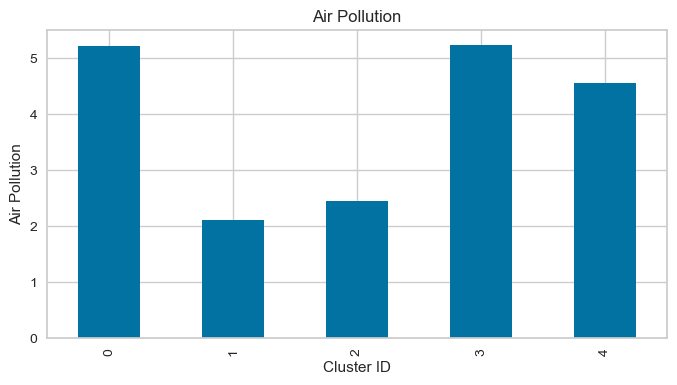

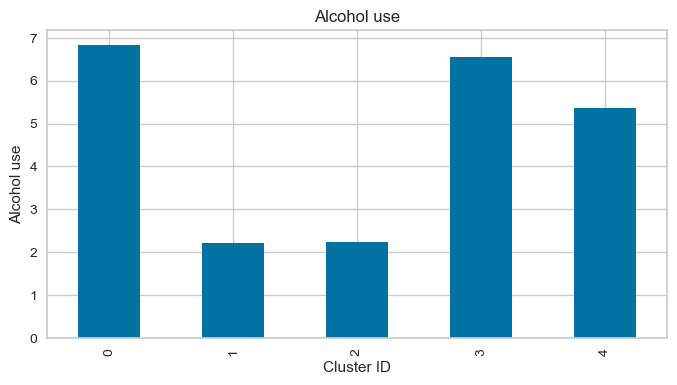

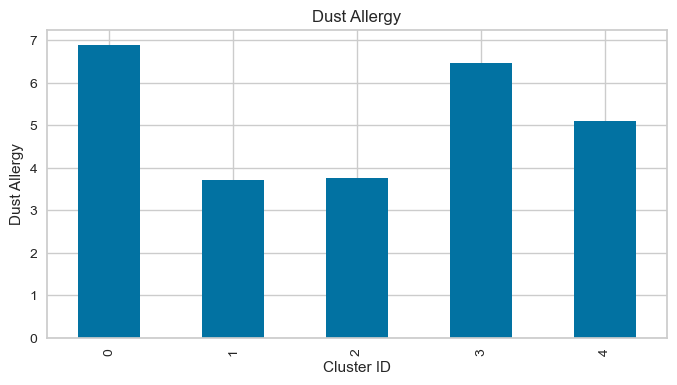

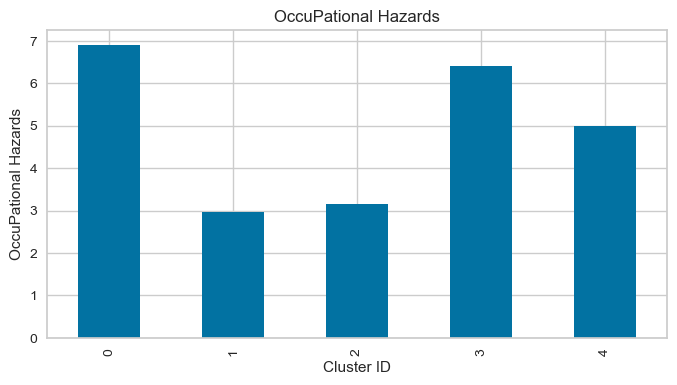

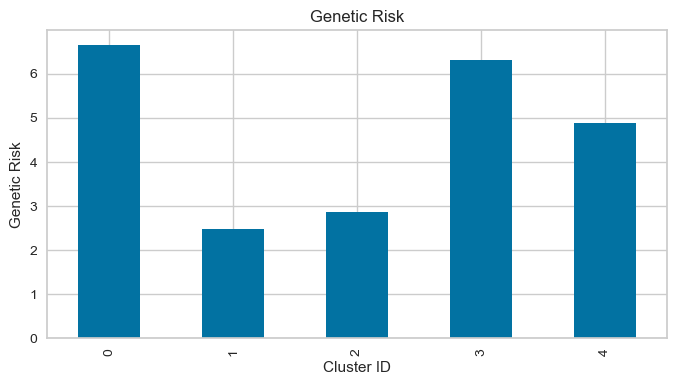

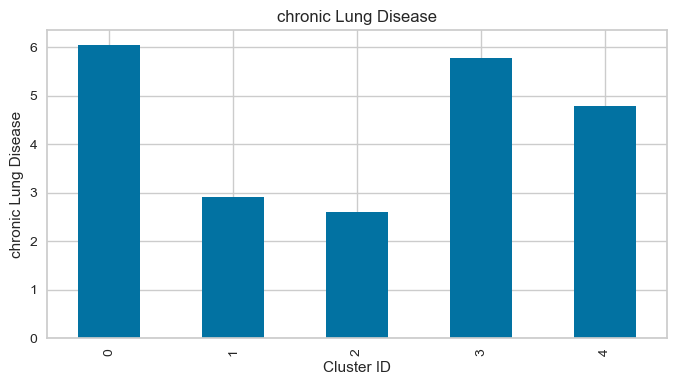

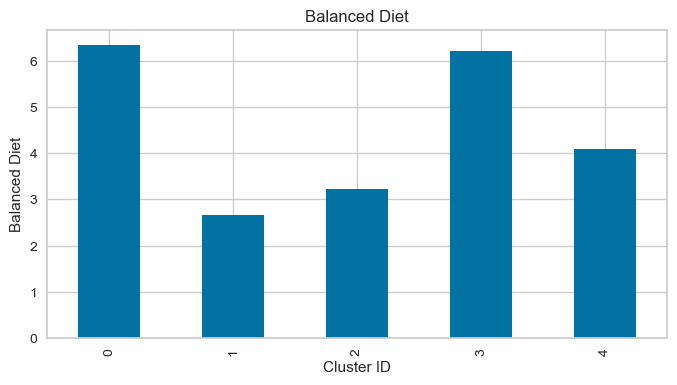

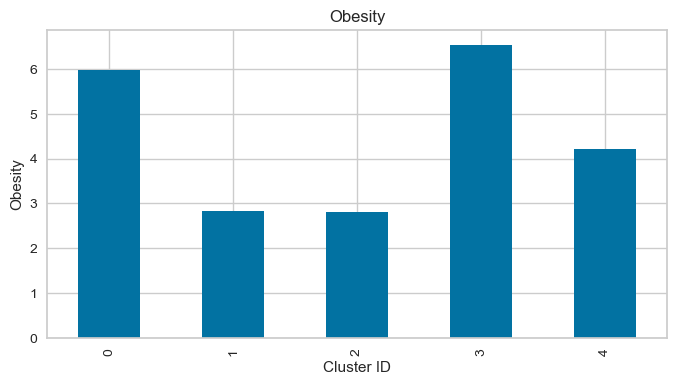

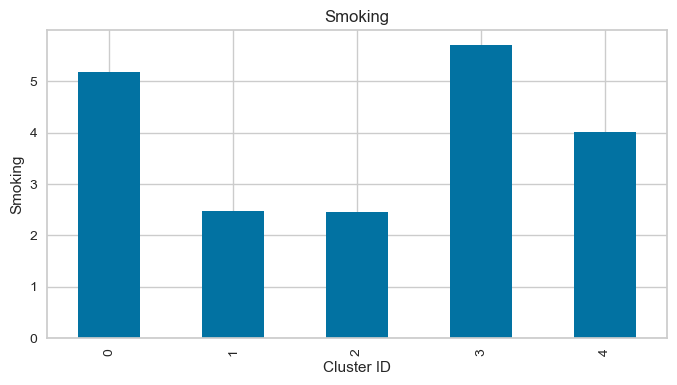

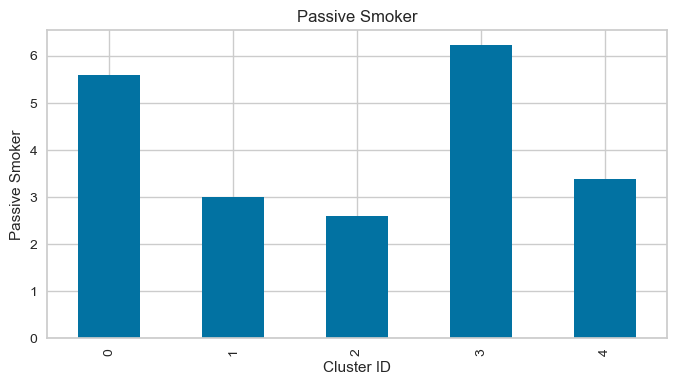

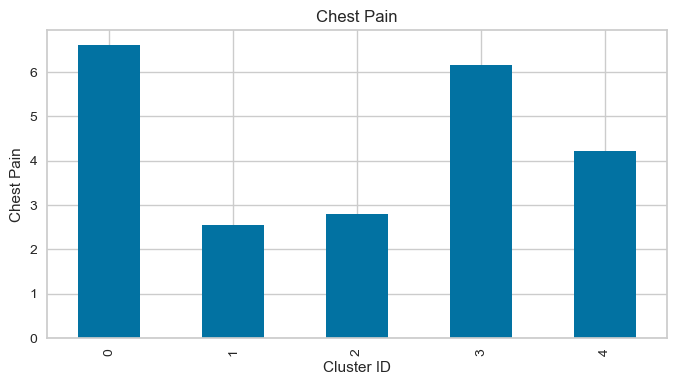

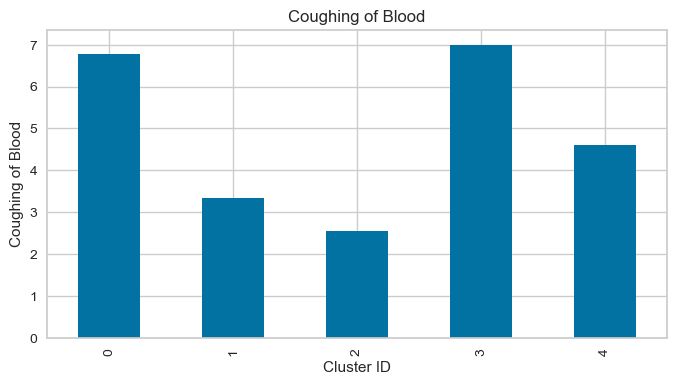

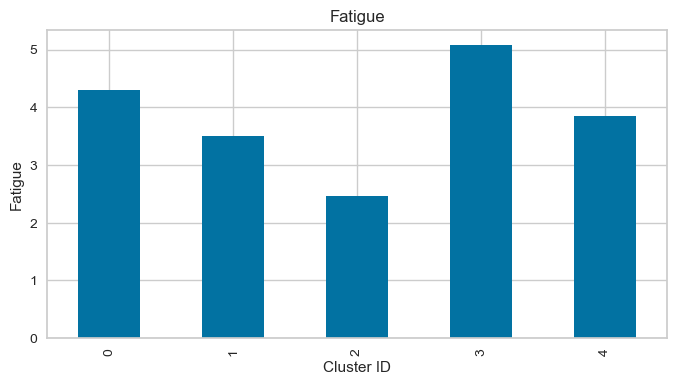

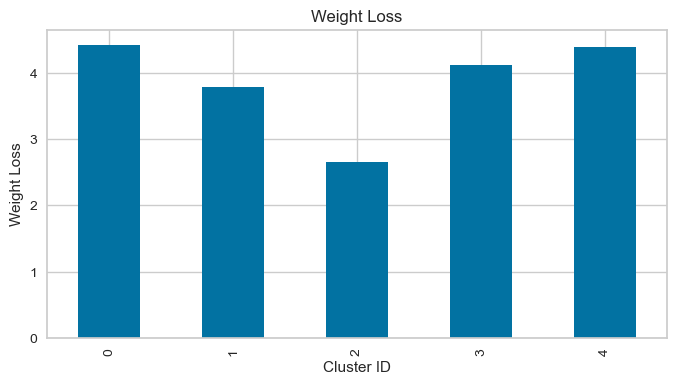

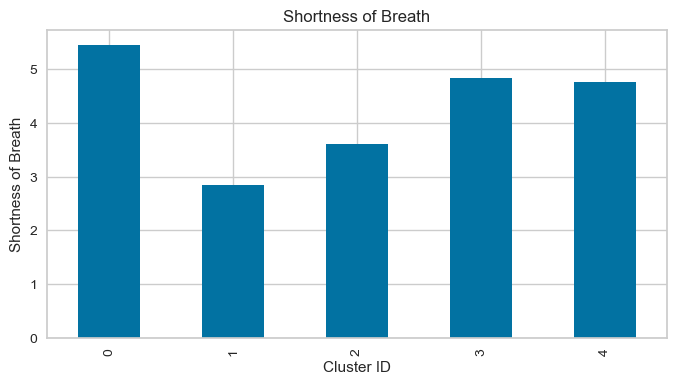

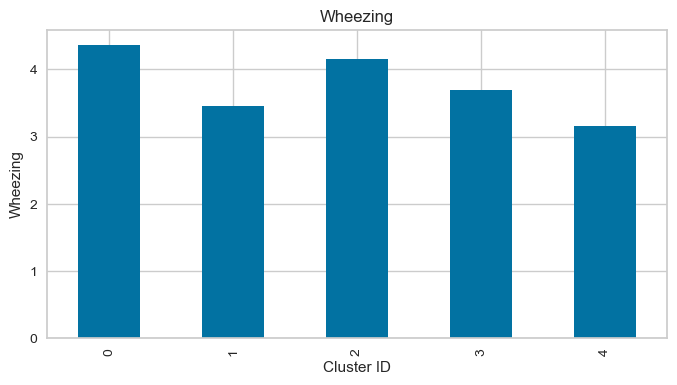

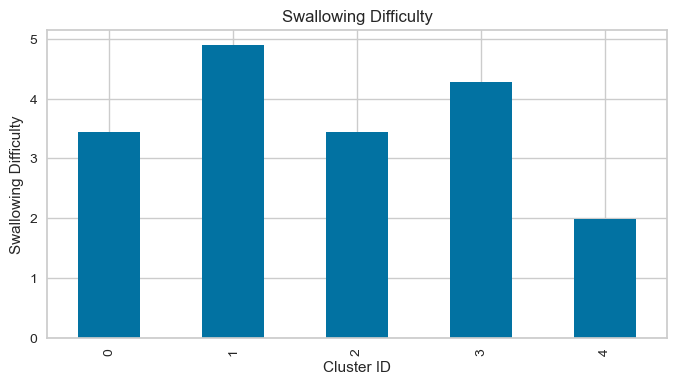

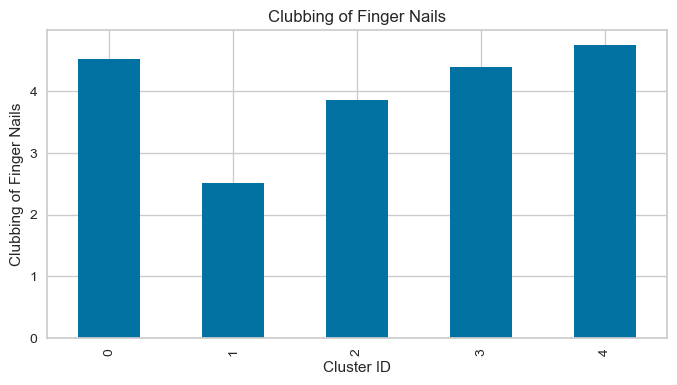

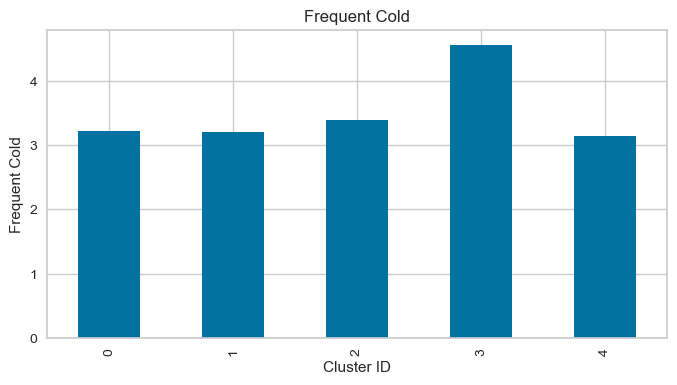

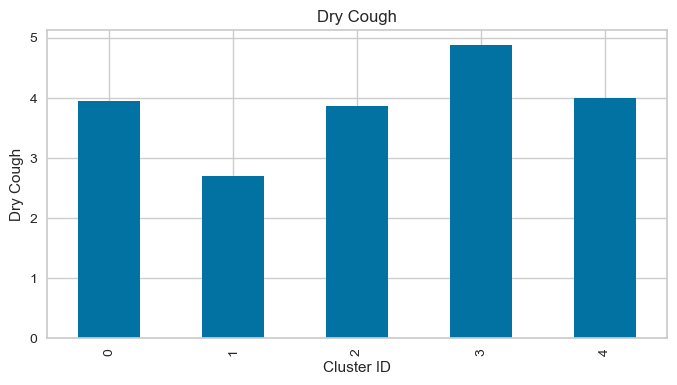

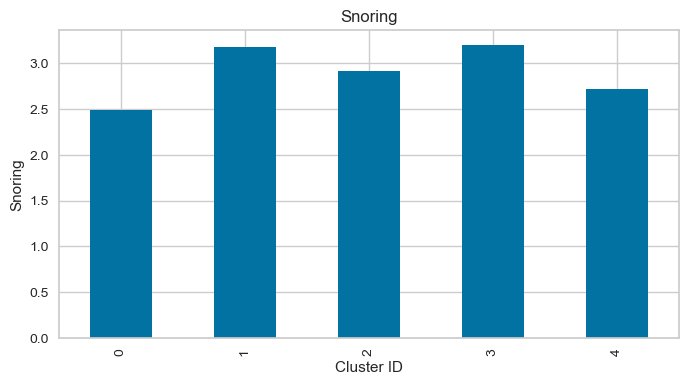

In [154]:
#We'll now do cluster profiling by looking at some bar grapghs 
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring']

for column in columns_to_plot:
    lung_cancer_new.groupby('cluster_id')[column].mean().plot(kind='bar', figsize=(8, 4), title=column)
    plt.xlabel('Cluster ID')
    plt.ylabel(column)
    plt.show()

In [160]:
#We see that the clusters follow a similar pattern
#Cluster 0 - Young adults just less than 30 who occupy this group and are suscptible to cancer as they possess most of the qualities in the dataset including dry cough, wheexzing, genetic conditions, alcholo use etc. 
#Cluster 1 - Adults in their forties who are generally fit with a few prexisting codnitions, less susceptible to cancer
#Cluster 2 - Millenials who are fit and least likely to be susxpetible to have cancer, they have a shortness of breath and wheezing but no major symptoms contibuting to cancer
#Cluster 3 - They also also adults in their forties, differentiating factor is the smoking, they are avid smokers and consume smoke passively as well which shows in other factors like wheezing, dry cough, most likely suscpetible to throat or lung cancer
#Cluster 4 - Oldest age group cliuster with suprsingly not the most problems in terms of wheezing, dry cough and obesity as expected compared to other groups. They are susceptible to cancer as all the factos are present in moderation which is a cause of concern
#With this we can determine that cluster 0 and cluster 3 are most suscpetible looking at all the factors

In [ ]:
#Thank you for getting to the end of my dataset